In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
pn.extension('tabulator')
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("co2-data.csv")

In [3]:
df = df.fillna(0)
df['gdp_per_capita'] = np.where(df['population']!= 0, df['gdp']/ df['population'], 0)

In [4]:
df["co2"]

0         0.000
1         0.000
2         0.000
3         0.000
4         0.000
          ...  
50593     9.596
50594    11.795
50595    11.115
50596    10.608
50597    11.296
Name: co2, Length: 50598, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50598 non-null  object 
 1   year                                       50598 non-null  int64  
 2   iso_code                                   50598 non-null  object 
 3   population                                 50598 non-null  float64
 4   gdp                                        50598 non-null  float64
 5   cement_co2                                 50598 non-null  float64
 6   cement_co2_per_capita                      50598 non-null  float64
 7   co2                                        50598 non-null  float64
 8   co2_growth_abs                             50598 non-null  float64
 9   co2_growth_prct                            50598 non-null  float64
 10  co2_including_luc     

In [6]:
df[(df["country"] == "India")]

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,gdp_per_capita
21294,India,1850,IND,2.357324e+08,2.233026e+11,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,947.271421
21295,India,1851,IND,2.365359e+08,2.240905e+11,0.000,0.000,0.000,0.000,0.000,...,6.460,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,947.384673
21296,India,1852,IND,2.373184e+08,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,6.262,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000000
21297,India,1853,IND,2.380798e+08,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,6.093,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000000
21298,India,1854,IND,2.388436e+08,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,5.941,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21461,India,2017,IND,1.354196e+09,8.275647e+12,121.047,0.089,2434.868,51.052,2.142,...,4.641,0.032,0.032,0.070,0.006,3215.07,3242.17,-145.793,-5.988,6111.115942
21462,India,2018,IND,1.369003e+09,8.835758e+12,138.965,0.102,2600.447,165.578,6.800,...,4.674,0.033,0.033,0.072,0.006,3360.56,3388.92,-168.744,-6.489,6454.153718
21463,India,2019,IND,1.383112e+09,0.000000e+00,143.664,0.104,2626.459,26.013,1.000,...,4.707,0.033,0.034,0.073,0.006,3363.60,3394.87,-158.946,-6.052,0.000000
21464,India,2020,IND,1.396387e+09,0.000000e+00,122.908,0.088,2445.012,-181.447,-6.908,...,4.737,0.034,0.035,0.075,0.006,0.00,0.00,-168.131,-6.877,0.000000


In [7]:
"United States" in list(df["country"])

True

In [8]:
continents = ["Asia", "North America" , "South America", "Africa", "Australia", "Europe", "Antartica"]
big_countries = ["United States","China","India", "Russia","United Kingdom", "Germany", "France", ]

big_countries_df = df[df["country"].isin(big_countries)].sort_values(by="year",ascending=True)
countries_df = big_countries_df[["country","year","co2"]]
countries_df["year"] = countries_df["year"].astype(int)
countries_df

,country,year,co2
47665,United Kingdom,1750,9.351
47666,United Kingdom,1751,9.351
47667,United Kingdom,1752,9.354
47668,United Kingdom,1753,9.354
47669,United Kingdom,1754,9.358
...,...,...,...
38579,Russia,2021,1755.547
47936,United Kingdom,2021,346.773
18123,Germany,2021,674.754
21465,India,2021,2709.684


In [9]:
 list(plt.style.available)

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [10]:
plt.style.use('seaborn-v0_8-whitegrid')

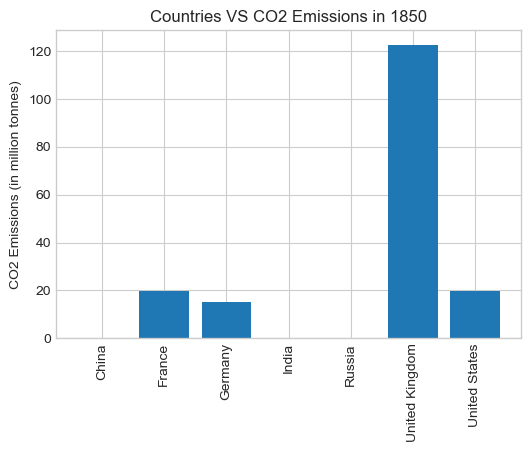

In [105]:
#Big Countries contribution for CO2

def create_matplotlib_plot_country(value):
    fig, ax = plt.subplots(figsize=(6, 4))
    selected_year_data = countries_df[countries_df["year"] == value]
    selected_year_data = selected_year_data.sort_values(by="country")
        
    ax.bar(selected_year_data["country"], selected_year_data["co2"])
    ax.set_xticklabels(selected_year_data["country"],rotation=90)
    ax.set_title(f'Countries VS CO2 Emissions in {value}')
    ax.set_ylabel("CO2 Emissions (in million tonnes)")
    return fig


def update_plot_country(event):
    value = event.new
    fig = create_matplotlib_plot_country(value)
    mpl_pane.object = fig

slider = pn.widgets.FloatSlider(start=1750, end=2021, step=2, value=1850)
slider.param.watch(update_plot_country, 'value')

initial_plot_c = create_matplotlib_plot_country(slider.value)
mpl_pane = pn.pane.Matplotlib(initial_plot_c, tight=True)


In [12]:
# app = pn.Column(
#     '## Year Slider',
#     slider,
#     mpl_pane,
# )

# app.show()

In [13]:
population_data = df[(df["population"] != 0)].sort_values(by="year",ascending=True)
population_data["population"] = pd.to_numeric(population_data["population"], downcast='integer')

population_data = population_data[["population","year","country"]]
population_data = population_data[population_data["country"].isin(big_countries)].sort_values(by="year",ascending=True)
population_data

,population,year,country
47665,9288174,1750,United Kingdom
47675,9823166,1760,United Kingdom
47685,10371586,1770,United Kingdom
47695,10935458,1780,United Kingdom
47705,11517161,1790,United Kingdom
...,...,...,...
16570,64531448,2021,France
9425,1425893504,2021,China
38579,145102752,2021,Russia
47936,67281040,2021,United Kingdom


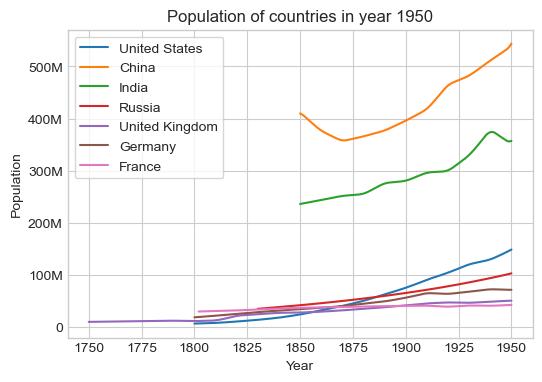

In [141]:
#creating graph of population
from matplotlib.ticker import FuncFormatter
def billions_formatter(x, pos):
    if x == 0:
        return "0"
    elif x < 1e9:
        return f"{int(x/1e6):d}M"
    else:
        return f"{x/1e9:.1f}B"
    
def create_matplotlib_plot(value):
    fig, ax = plt.subplots(figsize=(6, 4))
    selected_year_data = population_data[population_data["year"] <= value]
    selected_year_data = selected_year_data.sort_values(by="year")
    
    for i in range(len(big_countries)):
        selected_country = selected_year_data[selected_year_data["country"] == big_countries[i]]
        ax.plot(selected_country["year"],selected_country["population"], label=big_countries[i])
        
    plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))
    ax.set_title(f'Population of countries in year {value}')
    ax.set_ylabel("Population")
    ax.legend(loc=0,frameon=True)
    ax.set_xlabel("Year")
    return fig

def update_plot(event):
    value = event.new
    fig = create_matplotlib_plot(value)
    mpl_pane2.object = fig

slider.param.watch(update_plot, 'value')

initial_plot = create_matplotlib_plot(slider.value)
mpl_pane2 = pn.pane.Matplotlib(initial_plot, tight=True)



In [15]:
df[df["country"] == "India"].sort_values(by="year")

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,gdp_per_capita
21294,India,1850,IND,2.357324e+08,2.233026e+11,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,947.271421
21295,India,1851,IND,2.365359e+08,2.240905e+11,0.000,0.000,0.000,0.000,0.000,...,6.460,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,947.384673
21296,India,1852,IND,2.373184e+08,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,6.262,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000000
21297,India,1853,IND,2.380798e+08,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,6.093,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000000
21298,India,1854,IND,2.388436e+08,0.000000e+00,0.000,0.000,0.000,0.000,0.000,...,5.941,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21461,India,2017,IND,1.354196e+09,8.275647e+12,121.047,0.089,2434.868,51.052,2.142,...,4.641,0.032,0.032,0.070,0.006,3215.07,3242.17,-145.793,-5.988,6111.115942
21462,India,2018,IND,1.369003e+09,8.835758e+12,138.965,0.102,2600.447,165.578,6.800,...,4.674,0.033,0.033,0.072,0.006,3360.56,3388.92,-168.744,-6.489,6454.153718
21463,India,2019,IND,1.383112e+09,0.000000e+00,143.664,0.104,2626.459,26.013,1.000,...,4.707,0.033,0.034,0.073,0.006,3363.60,3394.87,-158.946,-6.052,0.000000
21464,India,2020,IND,1.396387e+09,0.000000e+00,122.908,0.088,2445.012,-181.447,-6.908,...,4.737,0.034,0.035,0.075,0.006,0.00,0.00,-168.131,-6.877,0.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50598 non-null  object 
 1   year                                       50598 non-null  int64  
 2   iso_code                                   50598 non-null  object 
 3   population                                 50598 non-null  float64
 4   gdp                                        50598 non-null  float64
 5   cement_co2                                 50598 non-null  float64
 6   cement_co2_per_capita                      50598 non-null  float64
 7   co2                                        50598 non-null  float64
 8   co2_growth_abs                             50598 non-null  float64
 9   co2_growth_prct                            50598 non-null  float64
 10  co2_including_luc     

In [17]:
df["primary_energy_consumption"]

0         0.000
1         0.000
2         0.000
3         0.000
4         0.000
          ...  
50593    45.257
50594    51.809
50595    46.120
50596    41.997
50597    42.145
Name: primary_energy_consumption, Length: 50598, dtype: float64

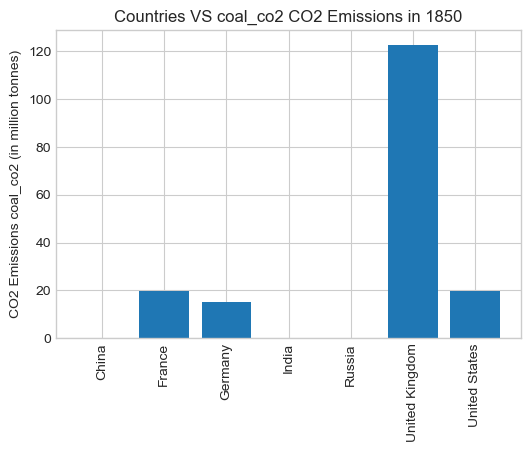

In [18]:
col_name = ["cement_co2","coal_co2","gas_co2","oil_co2"]

yaxis_co2 = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=["cement_co2","coal_co2","gas_co2","oil_co2"],
    button_type='success'
)

clicked_button_name = "coal_co2"
cement_co2 = big_countries_df[["country","year", "coal_co2"]]

def create_matplotlib_plot_cement(value):
    fig, ax = plt.subplots(figsize=(6, 4))
    selected_year_data = cement_co2[cement_co2["year"] == value]
    selected_year_data = selected_year_data.sort_values(by="country")
#     print(selected_year_data)
    ax.bar(selected_year_data["country"], selected_year_data[clicked_button_name])
    ax.set_xticklabels(selected_year_data["country"],rotation=90)
    ax.set_title(f'Countries VS {clicked_button_name} CO2 Emissions in {value}')
    ax.set_ylabel(f"CO2 Emissions {clicked_button_name} (in million tonnes)")
    fig.show()
    return fig


def update_plot_cement(event):
    value = event.new
    fig = create_matplotlib_plot_cement(value)
    mpl_pane_cement.object = fig


def on_button_click(event):
    global cement_co2,clicked_button_name
    clicked_button_name = event.new
    cement_co2 = big_countries_df[["country","year",clicked_button_name]]
    fig = create_matplotlib_plot_cement(slider.value)
    mpl_pane_cement.object = fig

yaxis_co2.param.watch(on_button_click, 'value') 
slider.param.watch(update_plot_cement, 'value')
initial_plot_cement = create_matplotlib_plot_cement(slider.value)
mpl_pane_cement = pn.pane.Matplotlib(initial_plot_cement, tight=True)



In [28]:
continents_not_needed = ['World', 'Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)',
                         'Central America (GCP)','Europe','Europe (GCP)','Europe (excl. EU-27)','Europe (excl. EU-28)',
                        'European Union (27)',
                        'European Union (27) (GCP)',
                        'European Union (28)',
                        'French Equatorial Africa (GCP)',
                        'French Equatorial Africa (Jones et al. 2023)',
                        'High-income countries',
                        'Least developed countries (Jones et al. 2023)',
                        'Low-income countries',
                        'Lower-middle-income countries',
                        'Middle East (GCP)',
                        'North America',
                        'North America (GCP)',
                        'North America (excl. USA)',
                        'Oceania',
                        'Oceania (GCP)',
                        'South America',
                        'South America (GCP)',
                        'Upper-middle-income countries','OECD (GCP)', "Non-OECD (GCP)"]
df_countries = df[df['country'].isin(continents_not_needed)==False]
df_continents = df[df['country'].isin(continents_not_needed)==True]

In [45]:
import plotly.express as px
temp = df_continents.groupby('country').sum().reset_index()
fig = px.treemap(temp,path = ['country'],values = 'co2')
fig.update_layout(title='Co2 Emission of Continents',title_x=0.5)

plotly_continents = pn.pane.Plotly(fig)

fig.show()

In [46]:
import plotly.express as px
temp = df_countries.groupby('country').sum().reset_index()
fig = px.treemap(temp,path = ['country'],values = 'co2')
fig.update_layout(title='Co2 Emission of countries',title_x=0.5)

plotly_countries(fig)

fig.show()

In [96]:
tmp = df_countries[df_countries['year'] <= 1985][['country','primary_energy_consumption', 'year']]
tmp = tmp.groupby('country').sum().reset_index()
tmp = tmp.sort_values('primary_energy_consumption')[-10:]
tmp

,country,primary_energy_consumption,year
98,India,21319.898,260780
176,Poland,24680.982,352005
106,Italy,31511.845,260780
74,France,41957.692,337566
38,Canada,46962.702,378885
233,United Kingdom,51057.770,440730
43,China,75608.513,260780
108,Japan,76290.920,260780
82,Germany,79544.629,366369
234,United States,399673.719,352005


In [97]:
import plotly.express as px
import numpy
 
# Random Data
random_x = [100, 2000, 550]
names = ['A', 'B', 'C']
 
fig = px.pie(values=tmp['primary_energy_consumption'], names=tmp['country'])
fig.show()
pie_chart = pn.pane.Plotly(fig)

In [156]:
#creating graph of population
from matplotlib.ticker import FuncFormatter
    
def create_pie(value):
    if int(value) < 1966:
        value = 1966
    tmp = df_countries[df_countries['year']<=int(value)][['country','primary_energy_consumption', 'year']]
    tmp = tmp.groupby('country').sum().reset_index()
    tmp = tmp.sort_values('primary_energy_consumption')[-10:]
    fig = px.pie(values=tmp['primary_energy_consumption'], names=tmp['country'])
    return fig

def update_pie(event):
    value = event.new
    fig = create_pie(value)
    pie_chart.object = fig

pie_slider = pn.widgets.FloatSlider(start=1966, end=2021, step=1, value=1985)
pie_slider.param.watch(update_pie, 'value')

initial_pie = create_pie(pie_slider.value)
pie_chart = pn.pane.Plotly(initial_pie, tight=True)

In [157]:
template = pn.template.FastListTemplate(
    title='CS699 Data Visualisation : CO2 Emission', 
    sidebar=[pn.pane.Markdown("# Slider for CO2 graphs"),
             pn.pane.Markdown("## YEAR"),   
             slider,
             pn.pane.Markdown("# Slider for PIE Chart"),
             pn.pane.Markdown("## YEAR"),
             pie_slider],
    main=[
        pn.Row(
            pn.Column(mpl_pane), 
            pn.Column(yaxis_co2,mpl_pane_cement)
        ),
            
        pn.Row(
            pn.Column(mpl_pane2),
            pn.Column(pie_chart)
        ),
        pn.Row(
            pn.Column(plotly_countries),
            pn.Column(plotly_continents)
        )
        ],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
template.show()
template.servable();


Launching server at http://localhost:56745
